<a href="https://colab.research.google.com/github/alvaro-salgado/PCD_MCD/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 3
Diseño de Experimentos para la Comparación de Modelos de Clasificación de Textos en Noticias Reales y Falsas

El conjunto de datos se obtuvo de [Kaggle](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv)



Cargar el dataset

In [ ]:
import pandas as pd
import numpy as np

# Cargar los datasets
fake_news = pd.read_csv("/content/Fake.csv")
true_news = pd.read_csv("/content/True.csv")

# Agregar etiquetas
fake_news["label"] = 1  # 1 para noticias falsas
true_news["label"] = 0  # 0 para noticias reales

# Combinar los datasets
dataset = pd.concat([fake_news, true_news], ignore_index=True)

# Mezclar el dataset para evitar sesgos
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

dataset.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",1
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",0
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",0
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",1
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",0


Preprocesamiento

In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Función para limpiar el texto
def clean_text(text):
    text = re.sub(r"[^\w\s]", "", text)  # Eliminar caracteres especiales
    text = text.lower()  # Convertir a minúsculas
    return text

# Aplicar la limpieza a las columnas 'title' y 'text'
dataset["title"] = dataset["title"].apply(clean_text)
dataset["text"] = dataset["text"].apply(clean_text)

# Combinar 'title' y 'text' para crear una sola columna de texto
dataset["full_text"] = dataset["title"] + " " + dataset["text"]

# Vectorización con TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X = vectorizer.fit_transform(dataset["full_text"]).toarray()
y = dataset["label"]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizar noticias falsas
vectorizer_fake = TfidfVectorizer(max_features=20, stop_words="english")
X_fake = vectorizer_fake.fit_transform(dataset[dataset["label"] == 1]["full_text"])

# Vectorizar noticias reales
vectorizer_real = TfidfVectorizer(max_features=20, stop_words="english")
X_real = vectorizer_real.fit_transform(dataset[dataset["label"] == 0]["full_text"])

# Obtener las palabras más comunes
fake_words = vectorizer_fake.get_feature_names_out()
real_words = vectorizer_real.get_feature_names_out()

print("Palabras más frecuentes en noticias falsas:", fake_words)
print("Palabras más frecuentes en noticias reales:", real_words)

Palabras más frecuentes en noticias falsas: ['america' 'campaign' 'clinton' 'donald' 'hillary' 'house' 'just' 'like'
 'media' 'new' 'news' 'obama' 'people' 'president' 'said' 'state' 'time'
 'trump' 'video' 'white']
Palabras más frecuentes en noticias reales: ['campaign' 'election' 'government' 'house' 'new' 'north' 'party' 'people'
 'president' 'republican' 'reuters' 'said' 'state' 'states' 'told' 'trump'
 'trumps' 'united' 'washington' 'year']


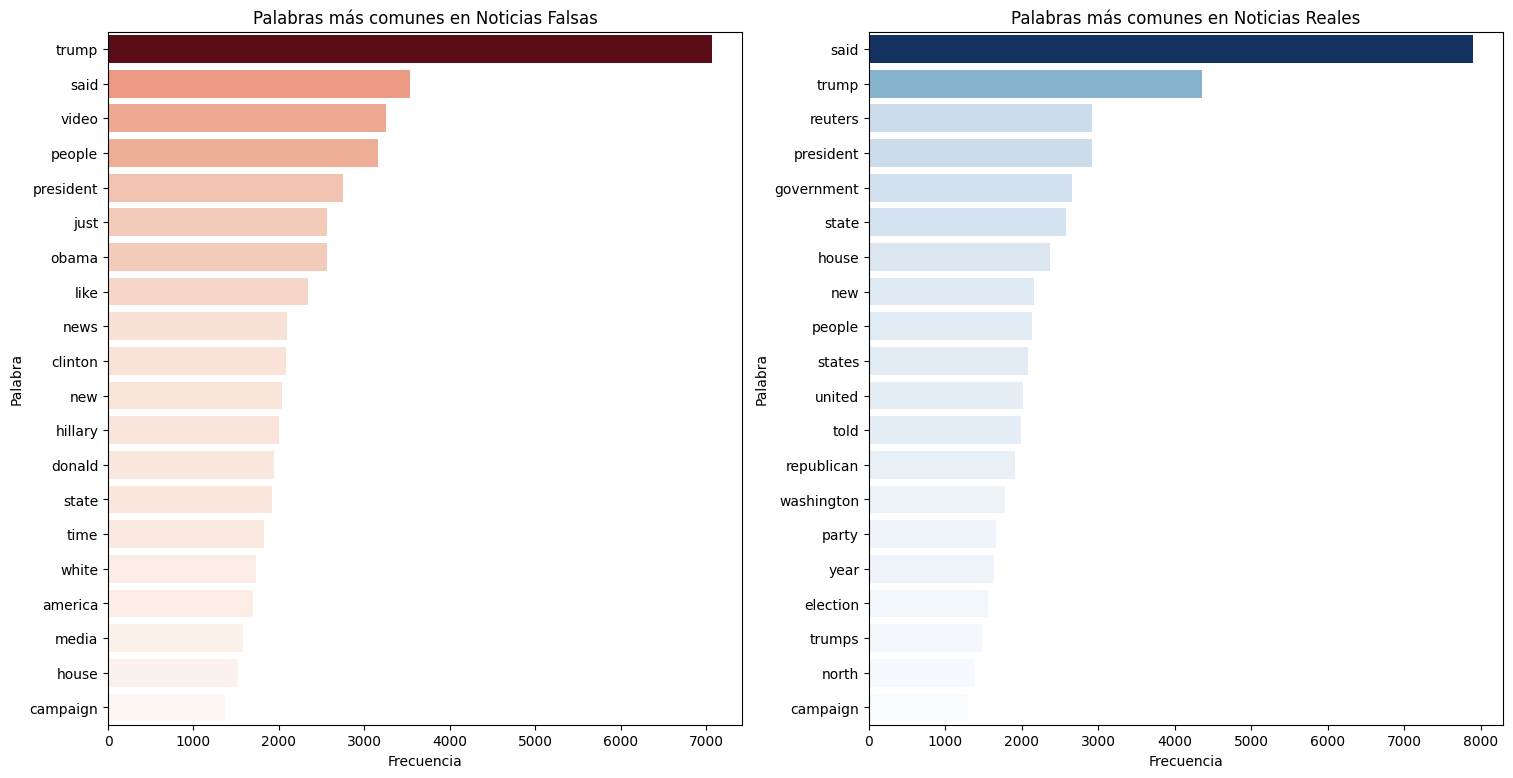

In [ ]:
import pandas as pd
import seaborn as sns

# Contar la frecuencia de cada palabra en cada tipo de noticia
fake_counts = X_fake.toarray().sum(axis=0)
real_counts = X_real.toarray().sum(axis=0)

# Crear un DataFrame con los datos
df_fake = pd.DataFrame({"Palabra": fake_words, "Frecuencia": fake_counts})
df_real = pd.DataFrame({"Palabra": real_words, "Frecuencia": real_counts})

# Graficar
plt.figure(figsize=(18, 9))

plt.subplot(1, 2, 1)
sns.barplot(data=df_fake.sort_values(by="Frecuencia", ascending=False),
            x="Frecuencia", y="Palabra", hue="Frecuencia", palette="Reds", legend=False)
plt.title("Palabras más comunes en Noticias Falsas")

plt.subplot(1, 2, 2)
sns.barplot(data=df_real.sort_values(by="Frecuencia", ascending=False),
            x="Frecuencia", y="Palabra", hue="Frecuencia", palette="Blues", legend=False)
plt.title("Palabras más comunes en Noticias Reales")

plt.show()

Dividir dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamiento

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modelo 1: Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Modelo 2: Regresión Logística
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Modelo 3: SVM
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Naive Bayes Accuracy: 0.9344097995545657
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4270
           1       0.94      0.94      0.94      4710

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

Logistic Regression Accuracy: 0.9867483296213808
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4270
           1       0.99      0.98      0.99      4710

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

SVM Accuracy: 0.9934298440979955
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4270
           1       1.00      0.99      0.99      4710

    accuracy                           0.99      8980
   ma

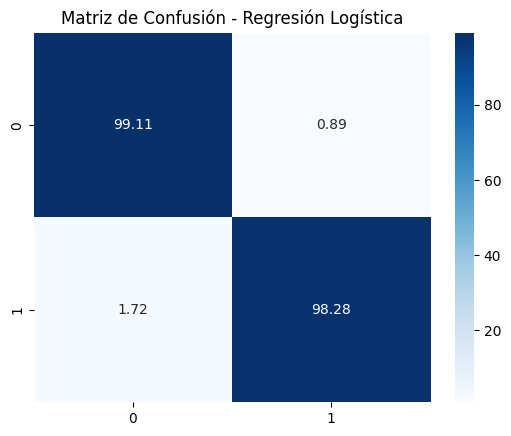

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión para Regresión Logística
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr_percent = cm_lr.astype(np.float64) / cm_lr.sum(axis=1, keepdims=True) *100
sns.heatmap(cm_lr_percent, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

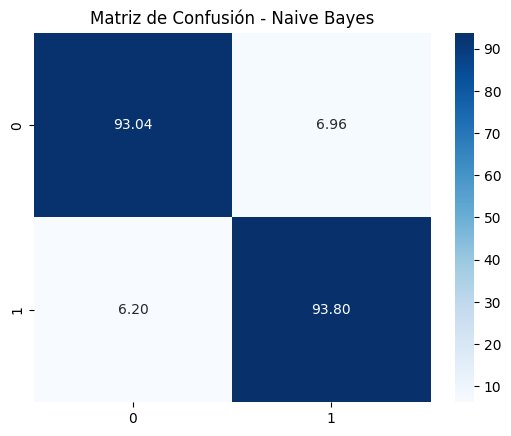

In [ ]:
# Matriz de confusión para Naive Bayes
# Calcular la matriz de confusión
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Convertir a porcentaje
cm_nb_percent = cm_nb.astype(np.float64) / cm_nb.sum(axis=1, keepdims=True) *100
sns.heatmap(cm_nb_percent, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()

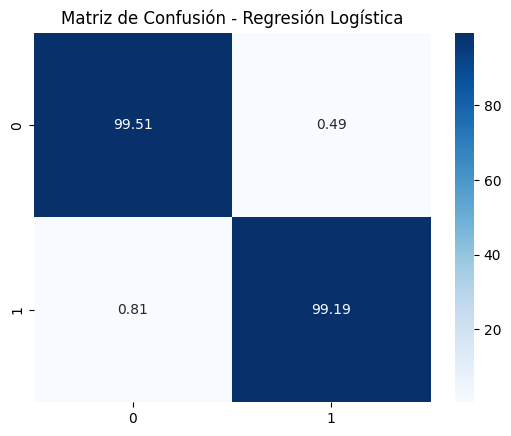

In [ ]:
# Matriz de confusión para SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm_percent = cm_svm.astype(np.float64) / cm_svm.sum(axis=1, keepdims=True) *100
sns.heatmap(cm_svm_percent, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Definir el modelo y la distribución de hiperparámetros
model = LogisticRegression(max_iter=1000)
param_dist = {
    'C': uniform(0.1, 10),  # Distribución uniforme entre 0.1 y 10
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # Número de combinaciones aleatorias a probar
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Entrenar con RandomizedSearchCV
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor puntuación de validación cruzada:", random_search.best_score_)

# Evaluar el mejor modelo
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy en el conjunto de prueba:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros: {'C': 6.086584841970366, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor puntuación de validación cruzada: 0.9956289046427674
Accuracy en el conjunto de prueba: 0.9959910913140312
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4270
           1       1.00      1.00      1.00      4710

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

